In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

### 1. Moving average filter. (20 points)

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3, 5x5 and 9x9 respectively. Apply the filter to the input image, show the filtering results and comment on the results.

Design the kernel of the filter by yourself. Then, 2D image filtering can be performed using the function `scipy.signal.convolve2d()`.

In [2]:
# Define the moving average filter
def ma_kernel(size):
    arrSize = (size,size)
    return np.ones(arrSize, dtype=int) / (size**2)

Image dimension = (1800, 2400)


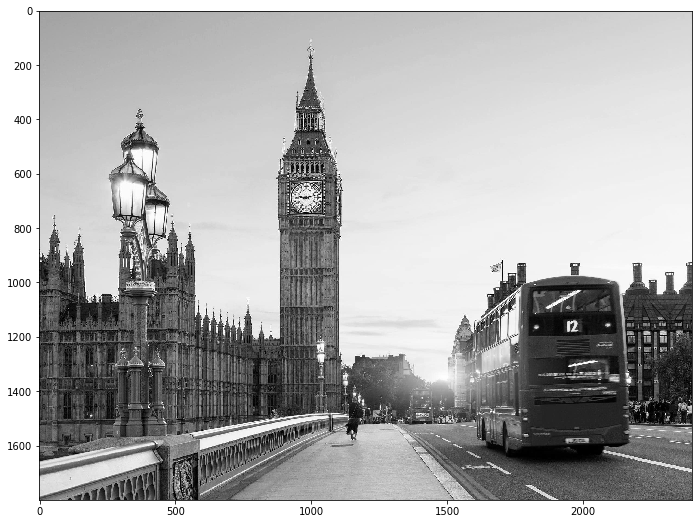

In [3]:
# Read the image (provided)
image = imageio.imread('london.jpg')
print('Image dimension =', image.shape)
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(12, 9)

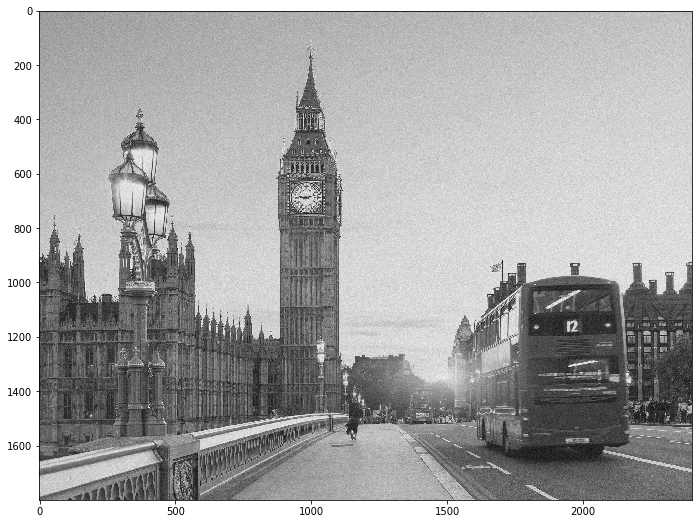

In [4]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(12, 9)

**Note: from now on, please use the noisy image as the input for the filters.**

### 1.1 Filter the noisy image with a 3x3 moving average filter. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


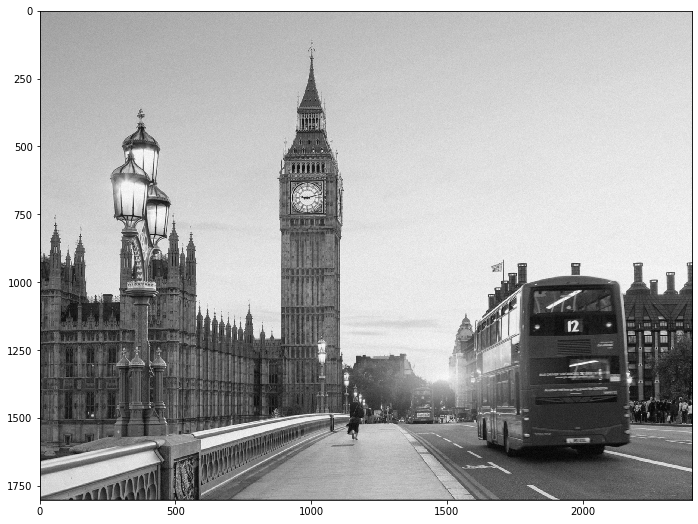

In [5]:
# Design the filter h
h = ma_kernel(3)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, 'full', 'fill')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.2 Filter the noisy image with a 5x5 moving average filter. (5 points)

Filter h:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


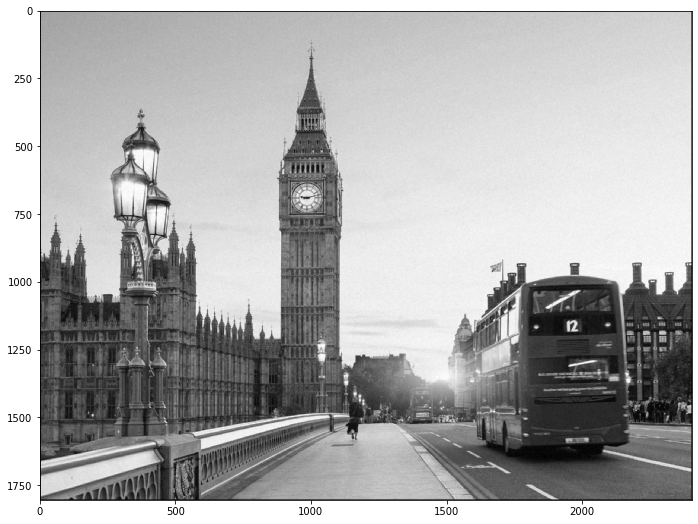

In [6]:
# Design the filter h
h = ma_kernel(5)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, 'full', 'fill')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.3 Filter the noisy image with a 9x9 moving average filter. (5 points)

Filter h:
[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


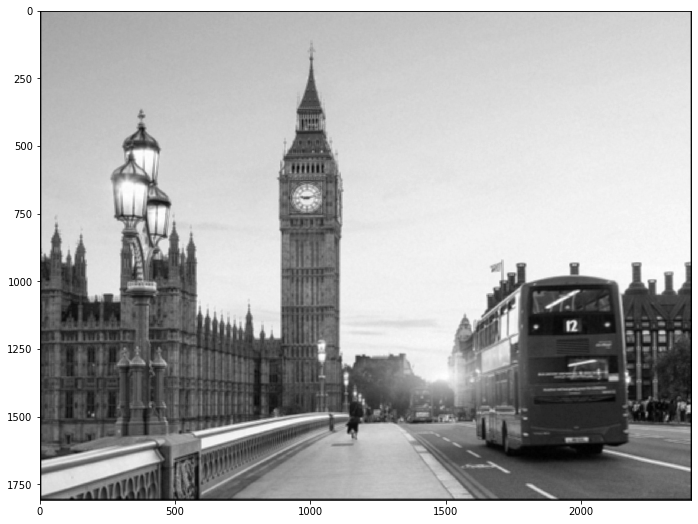

In [7]:
# Design the filter h
h = ma_kernel(9)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, 'full', 'fill')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.4 Comment on the filtering results. How do different kernel sizes influence the filtering results? (5 points)

A moving average filter acts to reduce noise as each output pixel is an unweighted average of the pixels around it. While this reduces noise, it also softens sharp details, increasing blurr and giving the image a smooth appearance.

The effect of the noise reduction can be most clearly seen in the sky, where the grainy input is output smoothly. This shows that moving average filters work well on large objects with few edges. The softness is best seen in the foreground. For example Big Ben, which has many sharp edges, becomes much more blurry after the filter is applied.

Increasing the kernel size increases the effect of the filter discussed above. Noise is reduced more and blur increases.


### 2. Edge detection. (45 points)

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters. Display the magnitude image of the Sobel filtering result and comment.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (5 points)

h_sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h_sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


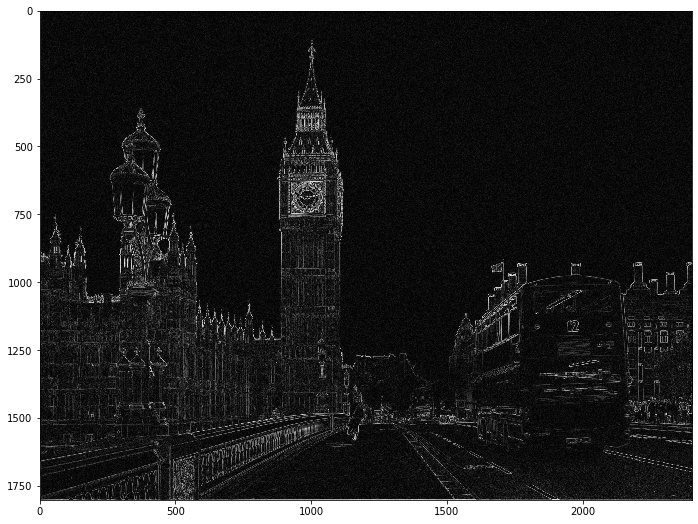

In [8]:
# Define the 3x3 Sobel filter
def sobel_3x3_kernel(axis):
    kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    if (axis == 'x'):
        return kernel
    if (axis == 'y'):
        return kernel.transpose()
    else:
        return "Axis must be x or y"
    
# Design the Sobel filters
h_sobel_x = sobel_3x3_kernel("x")
h_sobel_y = sobel_3x3_kernel("y")

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_noisy, h_sobel_x, 'full', 'fill')
sobel_y = scipy.signal.convolve2d(image_noisy, h_sobel_y, 'full', 'fill')

# Calculate the gradient magnitude

sobel_mag = (sobel_x**2 + sobel_y**2)**(1/2)

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 2.2 Design a 2D Gaussian filter. (8 points)

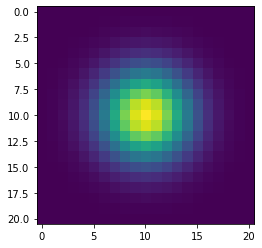

In [9]:
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    size = round(3.5 * sigma)
    length = 2*size + 1
    h = np.zeros(shape=(length, length))
    for i in range(length):
        for j in range(length):
            k = i - size
            l = j - size
            h[i,j] = (1/(2*math.pi*sigma**2))*(math.e**(-(k**2+l**2)/(2*sigma**2)))
    normalise = np.sum(h)
    h = h/normalise
    return h

# Display the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering. (5 points)

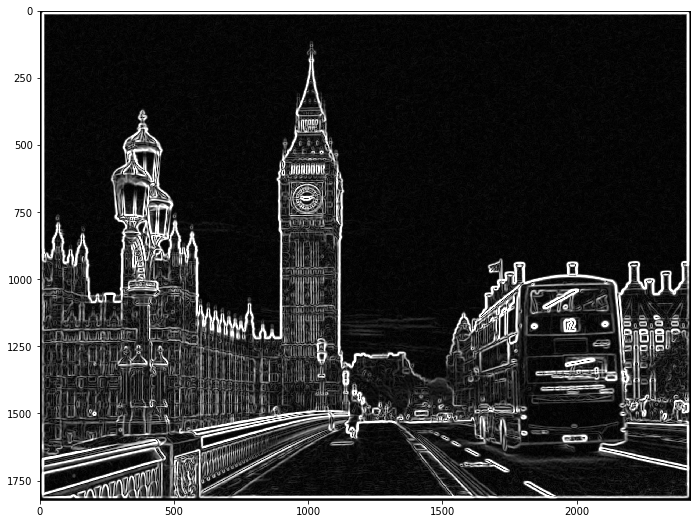

In [10]:
# Perform Gaussian smoothing before Sobel filtering
h_gaussian = gaussian_filter_2d(3)
gaussian_smoothed = scipy.signal.convolve2d(image_noisy, h_gaussian, 'full', 'fill')

# Sobel filtering

h_sobel_x = sobel_3x3_kernel("x")
h_sobel_y = sobel_3x3_kernel("y")

sobel_x = scipy.signal.convolve2d(gaussian_smoothed, h_sobel_x, 'full', 'fill')
sobel_y = scipy.signal.convolve2d(gaussian_smoothed, h_sobel_y, 'full', 'fill')

# Calculate the gradient magnitude
sobel_mag = (sobel_x**2 + sobel_y**2)**(1/2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels), followed by Sobel filtering. Evaluate the computational time for Gaussian smoothing. (7 points)

Gaussian smoothing took 25.283210277557373 seconds


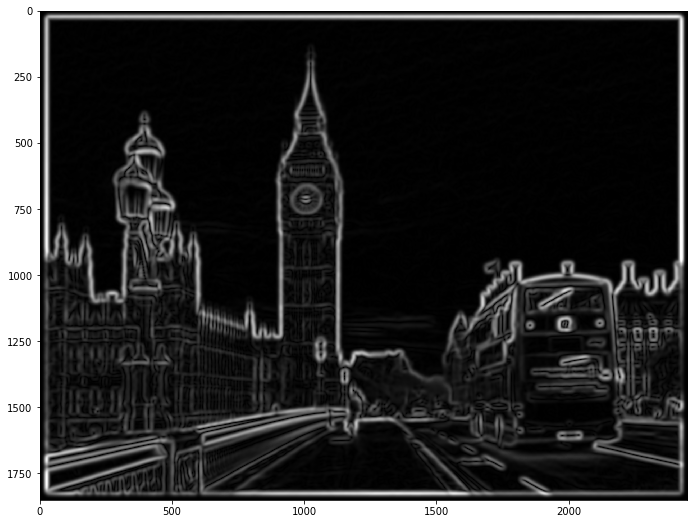

In [11]:
# Create the Gaussian filter
h_gaussian = gaussian_filter_2d(7)

# Perform Gaussian smoothing
start = time.time()
gaussian_smoothed = scipy.signal.convolve2d(image_noisy, h_gaussian, 'full', 'fill')
end = time.time()
print("Gaussian smoothing took {} seconds".format(end - start))

# Sobel filtering
h_sobel_x = sobel_3x3_kernel("x")
h_sobel_y = sobel_3x3_kernel("y")

sobel_x = scipy.signal.convolve2d(gaussian_smoothed, h_sobel_x, 'full', 'fill')
sobel_y = scipy.signal.convolve2d(gaussian_smoothed, h_sobel_y, 'full', 'fill')

# Calculate the gradient magnitude
sobel_mag = (sobel_x**2 + sobel_y**2)**(1/2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.5 Design 1D Gaussian filters along x-axis and y-axis respectively. (8 points)

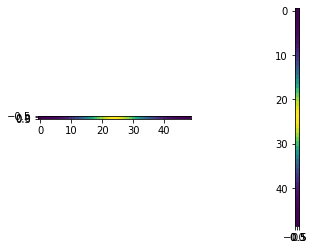

In [12]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    size = round(3.5 * sigma)
    length = 2*size + 1
    h = np.zeros(shape=(length, 1))
    for i in range(length):
        k = i - size
        h[i] = (1/((2*math.pi)**(1/2)*sigma))*(math.e**(-(k**2)/(2*sigma**2)))
    normalise = np.sum(h)
    h = h/normalise
    return h

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma).transpose()

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma)

# Display the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters, then apply the Sobel filters. Evaluate the computational time for separable Gaussian filtering. (7 points)

Gaussian smoothing took 1.98795485496521 seconds


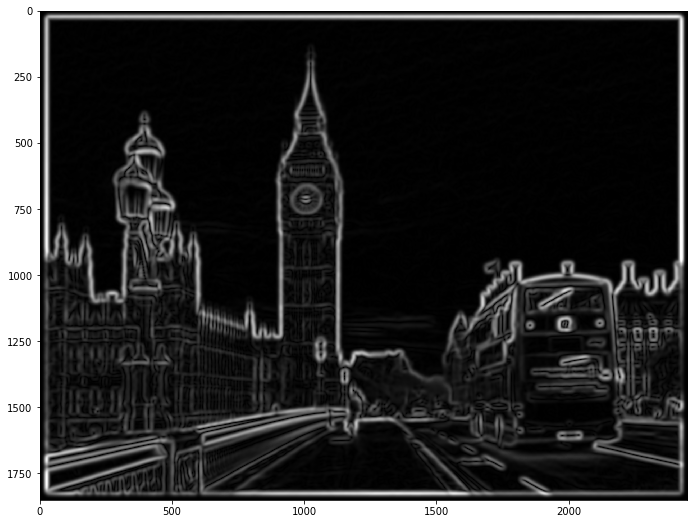

In [13]:
# Perform separable Gaussian smoothing before Sobel filtering
h_gaussian_x = gaussian_filter_1d(sigma).transpose()
h_gaussian_y = gaussian_filter_1d(sigma)

start = time.time()
gaussian_x = scipy.signal.convolve2d(image_noisy, h_gaussian_x, 'full', 'fill')
gaussian_smoothed = scipy.signal.convolve2d(gaussian_x, h_gaussian_y, 'full', 'fill')
end = time.time()
print("Gaussian smoothing took {} seconds".format(end - start))

# Sobel filtering
h_sobel_x = sobel_3x3_kernel("x")
h_sobel_y = sobel_3x3_kernel("y")

sobel_x = scipy.signal.convolve2d(gaussian_smoothed, h_sobel_x, 'full', 'fill')
sobel_y = scipy.signal.convolve2d(gaussian_smoothed, h_sobel_y, 'full', 'fill')

# Calculate the gradient magnitude
sobel_mag = (sobel_x**2 + sobel_y**2)**(1/2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (5 points)

The moving average filter acts to reduce noise as each output pixel is an unweighted average of the pixels around it. In contrast, the Gaussian filter acts to reduce noise as each output pixel is a weighted average of the pixels around it. This weight is determined by the Gaussian distribution, which is such that nearby pixels are given greater weight. This difference means that a Gaussian filter creates less blurr than a moving average filter of the same size, but is more succeptible to concentrated noise remaining in the output image.

The sobel filter then takes this smoothed image and detects edges. The two kernels are convolved with the smoothed image to calculate approximations of the horizontal and vertical derivatives of the image. We can then produce an output image showing both horizontal and vertical edges in the image by combining the vertical and horizontal sobel-filtered images.

On my machine, smoothing the input image with a non-separable Gaussian filter (sigma = 7) took 12.9 times longer than smoothing the input image with a separable Gaussian filter (sigma = 7). For a N x N image, the separable filter (K x 1 and 1 x K) has complexity big-O(N^2 K), while the non-separable filter (K x K) has complexity big-O(N^2 K^2). We can see that the non-separable filter has higher complexity for all K > 1, and that as K increases (size of the filter), the ratio of time taken will increase.


### 3. Laplacian filter. (20 points)

Perform Laplacian filtering and Laplacian of Gaussian filtering. Display the results and comment.

### 3.1 Implement a 3x3 Laplacian filter. (5 points)

h:
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


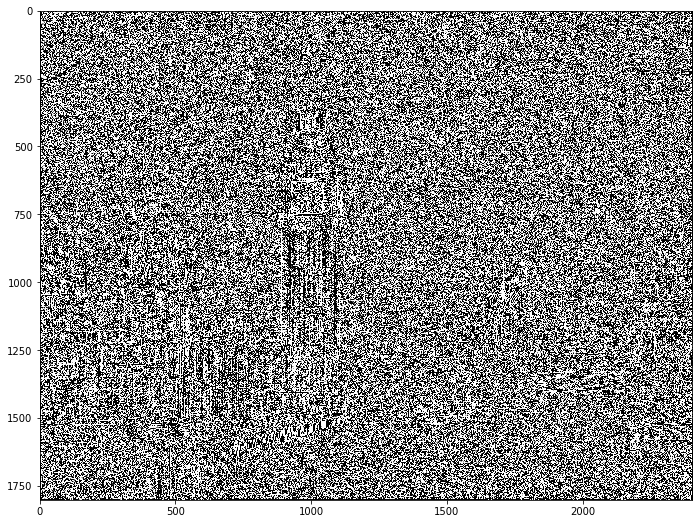

In [14]:
# Design the filter
def laplace_3x3_kernel():
    kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    return kernel

# Laplacian filtering
h = laplace_3x3_kernel()
lap = scipy.signal.convolve2d(image_noisy, h, 'full', 'fill')

# Print the filter (provided)
print('h:')
print(h)

# Display the filtering result (provided)
plt.imshow(lap, cmap='gray', vmin=-10, vmax=10)
plt.gcf().set_size_inches(12, 9)

### 3.2 Implement the Laplacian of Gaussian filter ($\sigma$ = 3 pixel). (10 points)

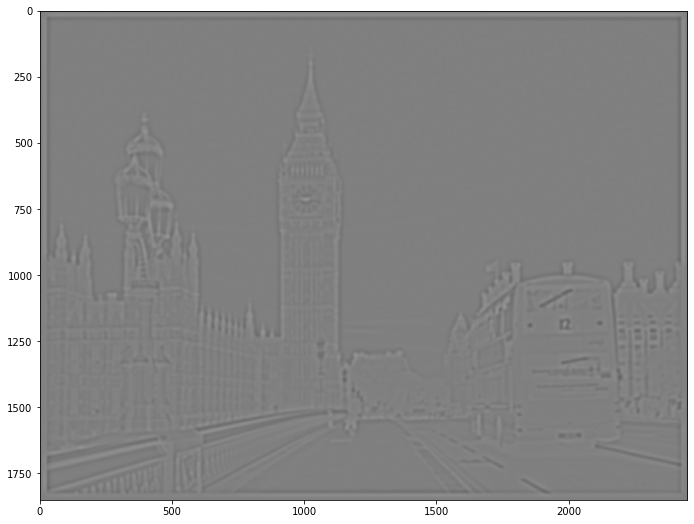

In [15]:
# Design the Gaussian filters
# The Gaussian filter along x-axis. Its shape is (1, sz).
h_gaussian_x = gaussian_filter_1d(sigma).transpose()

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_gaussian_y = gaussian_filter_1d(sigma)

# Gaussian smoothing
gaussian_x = scipy.signal.convolve2d(image_noisy, h_gaussian_x, 'full', 'fill')
gaussian_smoothed = scipy.signal.convolve2d(gaussian_x, h_gaussian_y, 'full', 'fill')

# Design the Laplacian filter
h_laplace = laplace_3x3_kernel()

# Laplacian filtering
lap = scipy.signal.convolve2d(gaussian_smoothed, h_laplace, 'full', 'fill')

# Display the filtering result (provided)
plt.imshow(lap, cmap='gray', vmin=-10, vmax=10)
plt.gcf().set_size_inches(12, 9)

### 3.3 Comments on the filtering results. (5 points)

The Laplacian filter is a second derivative filter used to find edges in images. We can see that when applied to the noisy input image, the noise is exaggerated in the output. This is because derivative filters are very sensitive to noise. Intuitively, many edges are detected in the noisy data and exaggerated in the output image.

The Gaussian filter acts to combat the effect of the noise by smoothing the image before running it through the Laplacian filter.

### 4. Exploration: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [16]:
# Import libaries (provided)
import torch

### 4.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [17]:
# Expand the dimension of the numpy array
array_noisy = np.array(image_noisy)
array_noisy4D = array_noisy.reshape(1,1,array_noisy.shape[0], array_noisy.shape[1])

# Convert to a Pytorch tensor using torch.from_numpy
tensor_noisy = torch.from_numpy(array_noisy4D)
print(tensor_noisy.shape)

torch.Size([1, 1, 1800, 2400])


### 4.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [18]:
# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Set the kernel weight
weight = ma_kernel(3)
weight4D = weight.reshape(1,1,weight.shape[0],weight.shape[1])
tensor_weight4D = torch.from_numpy(weight4D)
conv.weight = torch.nn.Parameter(tensor_weight4D)

### 4.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

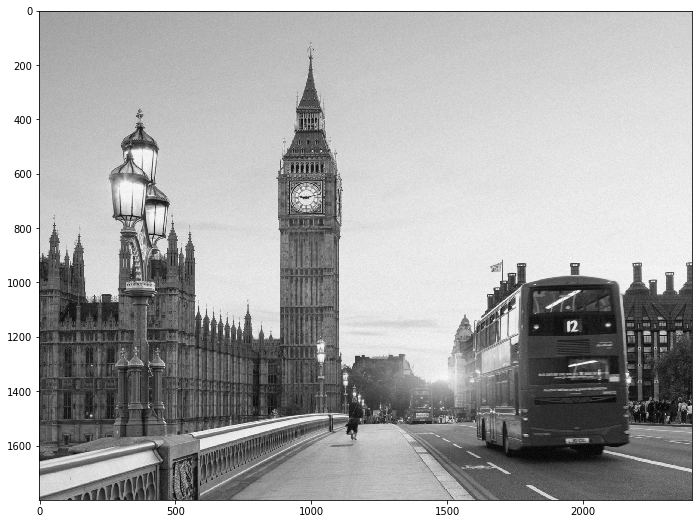

In [19]:
# Filtering
tensor_filtered = conv(tensor_noisy)
array_filtered = tensor_filtered.detach().numpy()
image_filtered = array_filtered.reshape(array_filtered.shape[2], array_filtered.shape[3])

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 5. Survey: How many hours does it take you to complete the coursework?

In [20]:
5

5